# Lab Experiment 2: Data Cleaning and Transformation
# Dataset: Breast Cancer Wisconsin (Diagnostic)

### Task 1: Install Required Packages
### pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn

In [208]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


# --- Task 1: EDA (Load Dataset) ---

In [209]:

breast_cancer = fetch_ucirepo(id=17)
X = breast_cancer.data.features
y = breast_cancer.data.targets
df = pd.concat([X, y], axis=1)

print("--- Task 1: EDA ---")

--- Task 1: EDA ---


In [210]:

# Display Head, Tail, Shape, Columns
print("First 3 Rows (Head):")
print(df.head(3).iloc[:, :5]) # Limiting columns for cleaner output

First 3 Rows (Head):
   radius1  texture1  perimeter1   area1  smoothness1
0    17.99     10.38       122.8  1001.0      0.11840
1    20.57     17.77       132.9  1326.0      0.08474
2    19.69     21.25       130.0  1203.0      0.10960


In [211]:

print("\nLast 3 Rows (Tail):")
print(df.tail(3).iloc[:, :5]) # Limiting columns for cleaner output



Last 3 Rows (Tail):
     radius1  texture1  perimeter1   area1  smoothness1
566    16.60     28.08      108.30   858.1      0.08455
567    20.60     29.33      140.10  1265.0      0.11780
568     7.76     24.54       47.92   181.0      0.05263


In [212]:


print("\nShape (Rows, Columns):", df.shape)
print("\nColumn Names:", df.columns.tolist())


Shape (Rows, Columns): (569, 31)

Column Names: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'Diagnosis']


In [213]:


# Info and Summary
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  conc

In [214]:
print("\nDataset Summary (First 5 Cols):")
print(df.describe().iloc[:, :5])


Dataset Summary (First 5 Cols):
          radius1    texture1  perimeter1        area1  smoothness1
count  569.000000  569.000000  569.000000   569.000000   569.000000
mean    14.127292   19.289649   91.969033   654.889104     0.096360
std      3.524049    4.301036   24.298981   351.914129     0.014064
min      6.981000    9.710000   43.790000   143.500000     0.052630
25%     11.700000   16.170000   75.170000   420.300000     0.086370
50%     13.370000   18.840000   86.240000   551.100000     0.095870
75%     15.780000   21.800000  104.100000   782.700000     0.105300
max     28.110000   39.280000  188.500000  2501.000000     0.163400


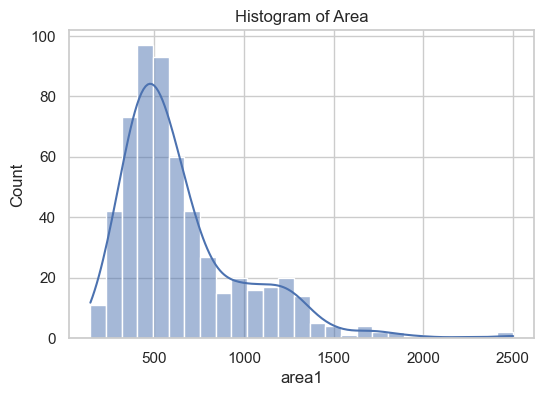

In [215]:

# Plots
plt.figure(figsize=(6, 4))
sns.histplot(df['area1'], kde=True)
plt.title('Histogram of Area')
plt.show()


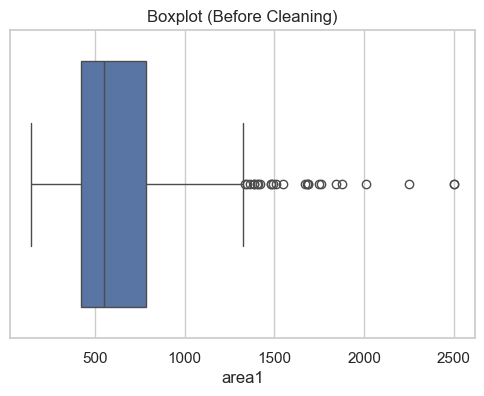

In [216]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['area1'])
plt.title('Boxplot (Before Cleaning)')
plt.show()

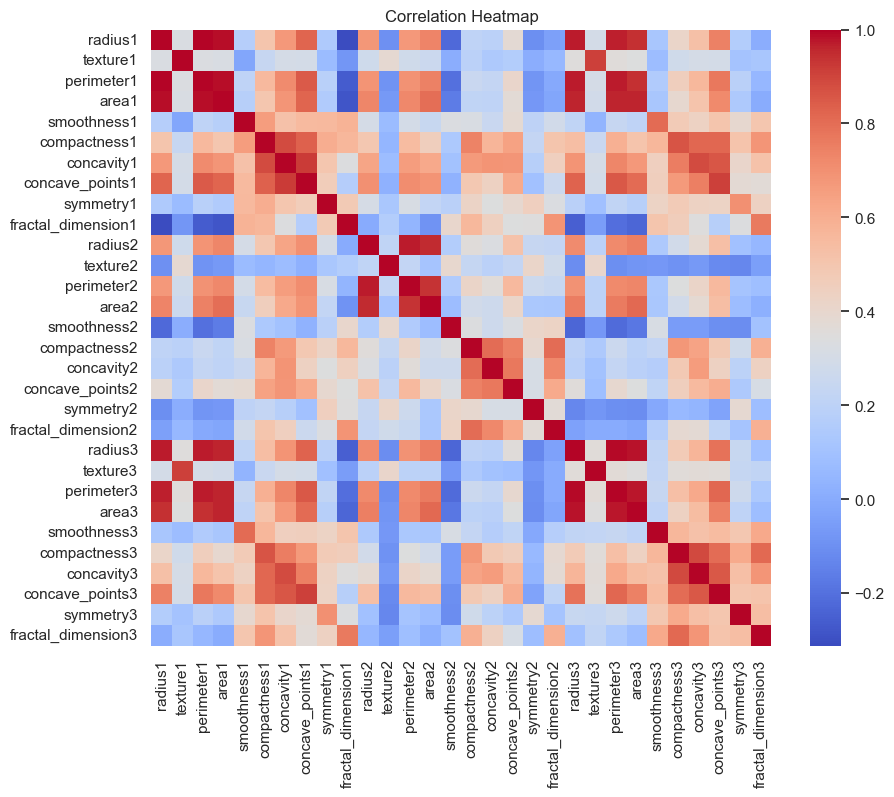

In [217]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [218]:
print("\nObservations: 569 samples, varied scales, outliers present.")


Observations: 569 samples, varied scales, outliers present.


# --- Task 2: Data Cleaning & Transformation ---

In [219]:

# 1. Rename columns (1->mean, 2->se, 3->worst)
df.columns = [c.replace('1', '_mean').replace('2', '_se').replace('3', '_worst') for c in df.columns]
print("Columns renamed successfully.")

Columns renamed successfully.


In [220]:
# 2. Convert incorrect data types
df['Diagnosis'] = df['Diagnosis'].astype('category')
print("Diagnosis type converted to Category.")

Diagnosis type converted to Category.


In [221]:



# 3. Remove duplicates
print(f"Duplicates found: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Duplicates found: 0


In [222]:

# 4. Drop irrelevant columns (Justification)
# Justification: No 'ID' column exists in this fetch, so no column is dropped.
print("Checked irrelevant columns: None dropped.")

Checked irrelevant columns: None dropped.


# --- Task 3: Handle Missing Values and Outliers ---

In [223]:


# 1. Identify Missing Values
missing_total = df.isnull().sum().sum()
print(f"Total Missing Values: {missing_total}")

Total Missing Values: 0


In [224]:

# 2. Apply imputation (Justification)
# Justification: Median Imputation is robust to outliers.
if missing_total > 0:
    imputer = SimpleImputer(strategy='median')
    df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])
    print("Applied Median Imputation.")
else:
    print("Strategy: Median Imputation (Not needed as no data missing).")


Strategy: Median Imputation (Not needed as no data missing).


In [225]:
# 3. Detect & Handle Outliers (Capping 'area_mean')
Q1 = df['area_mean'].quantile(0.25)
Q3 = df['area_mean'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['area_mean'] = np.clip(df['area_mean'], lower, upper)
print("Outliers handled via Capping.")


Outliers handled via Capping.


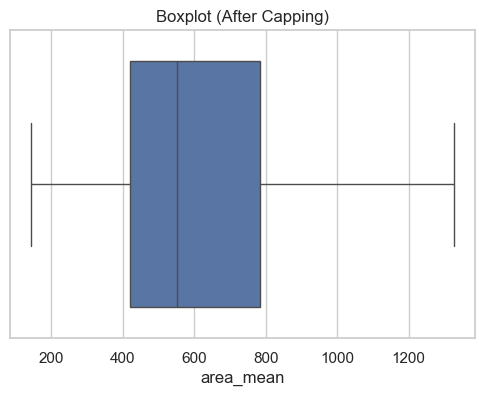

In [226]:



plt.figure(figsize=(6, 4))
sns.boxplot(x=df['area_mean'])
plt.title('Boxplot (After Capping)')
plt.show()

# --- Task 4: Feature Scaling ---

In [227]:

# 1. Separate Features and Target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [228]:

# 2. Encode Categorical Variable (Label Encoding)
y_encoded = LabelEncoder().fit_transform(y)
print("Target Encoded (B->0, M->1).")

Target Encoded (B->0, M->1).


In [229]:


# 3. Apply Standardization (Justification)
# Justification: Standardization (Z-score) maintains Gaussian distribution and handles outliers better than Min-Max.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [230]:



# 4. Display Transformed Dataset
X_final = pd.DataFrame(X_scaled, columns=X.columns)

print("\nTransformed Data (First 2 Rows, First 5 Cols):")
print(X_final.head(2).iloc[:, :5])

print("\nVerification (First 4 Cols):")
print(X_final.describe().iloc[:, :4].loc[['mean', 'std']])


Transformed Data (First 2 Rows, First 5 Cols):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean
0     1.097064     -2.073335        1.269934   1.184085         1.568466
1     1.829821     -0.353632        1.685955   2.249396        -0.826962

Verification (First 4 Cols):
       radius_mean  texture_mean  perimeter_mean     area_mean
mean -1.373633e-16  6.868164e-17   -1.248757e-16  7.492542e-17
std   1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00
